In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


Training Dataset Overview:
   tBodyAcc_Mean_1  tBodyAcc_Mean_2  tBodyAcc_Mean_3  tBodyAcc_STD_1  \
0         0.043580        -0.005970        -0.035054       -0.995381   
1         0.039480        -0.002131        -0.029067       -0.998348   
2         0.039978        -0.005153        -0.022651       -0.995482   
3         0.039785        -0.011809        -0.028916       -0.996194   
4         0.038758        -0.002289        -0.023863       -0.998241   

   tBodyAcc_STD_2  tBodyAcc_STD_3  tBodyAcc_Mad_1  tBodyAcc_Mad_2  \
0       -0.988366       -0.937382       -0.995007       -0.988816   
1       -0.982945       -0.971273       -0.998702       -0.983315   
2       -0.977314       -0.984760       -0.996415       -0.975835   
3       -0.988569       -0.993256       -0.996994       -0.988526   
4       -0.986774       -0.993115       -0.998216       -0.986479   

   tBodyAcc_Mad_3  tBodyAcc_Max_1  ...  fBodyGyroJerkMag_Skewness_1  \
0       -0.953325       -0.794796  ...                

C:\Users\abdel\AppData\Local\Temp\ipykernel_18204\3860711711.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity', data=data_train, palette='viridis')


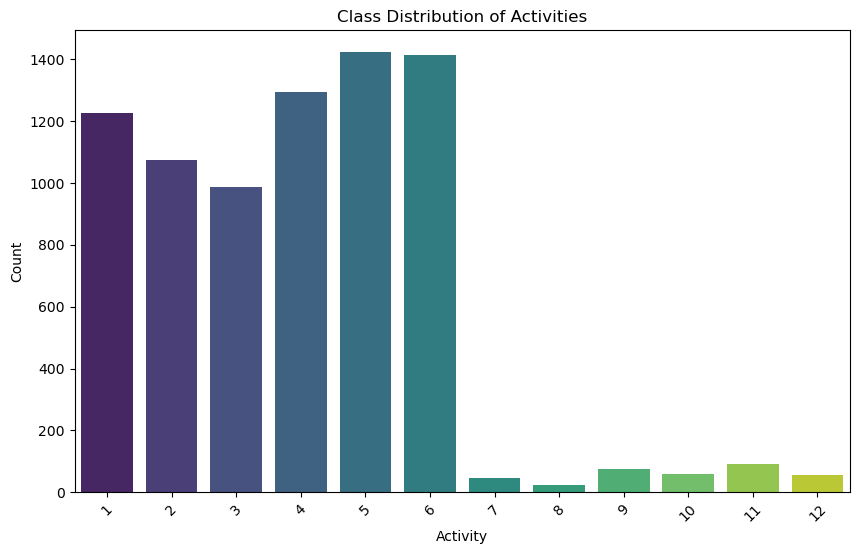


Correlation Matrix:
                                 tBodyAcc_Mean_1  tBodyAcc_Mean_2  \
tBodyAcc_Mean_1                         1.000000        -0.635967   
tBodyAcc_Mean_2                        -0.635967         1.000000   
tBodyAcc_Mean_3                        -0.630025         0.472460   
tBodyAcc_STD_1                          0.023420        -0.022666   
tBodyAcc_STD_2                         -0.020698         0.043462   
...                                          ...              ...   
tBodyGyroJerk_AngleWRTGravity_1         0.030064         0.029428   
tXAxisAcc_AngleWRTGravity_1             0.124145        -0.088592   
tYAxisAcc_AngleWRTGravity_1            -0.098704         0.080304   
tZAxisAcc_AngleWRTGravity_1            -0.079874         0.043551   
activity                                0.066650         0.074336   

                                 tBodyAcc_Mean_3  tBodyAcc_STD_1  \
tBodyAcc_Mean_1                        -0.630025        0.023420   
tBodyAcc_Mean_

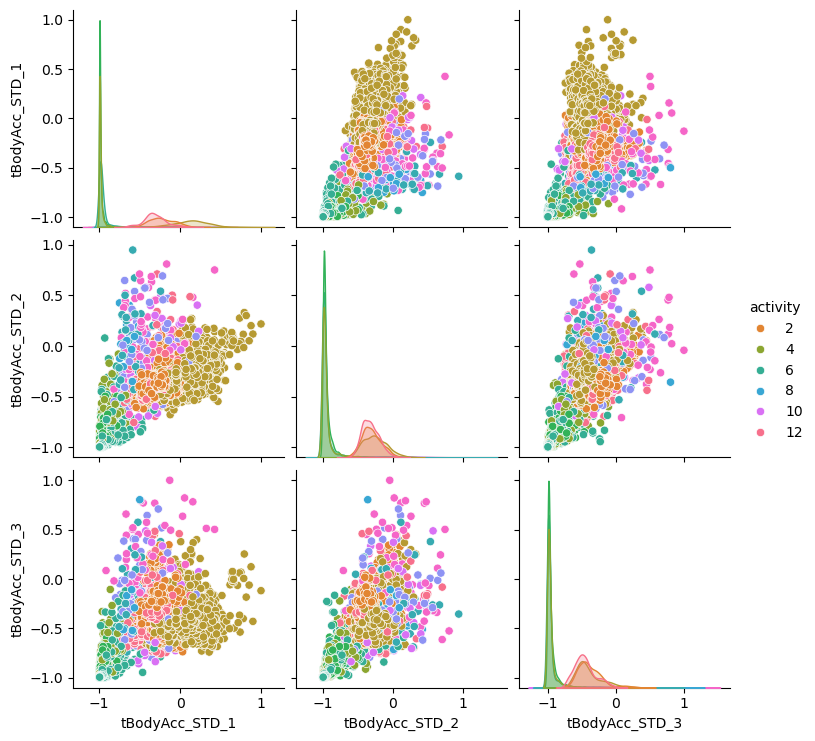

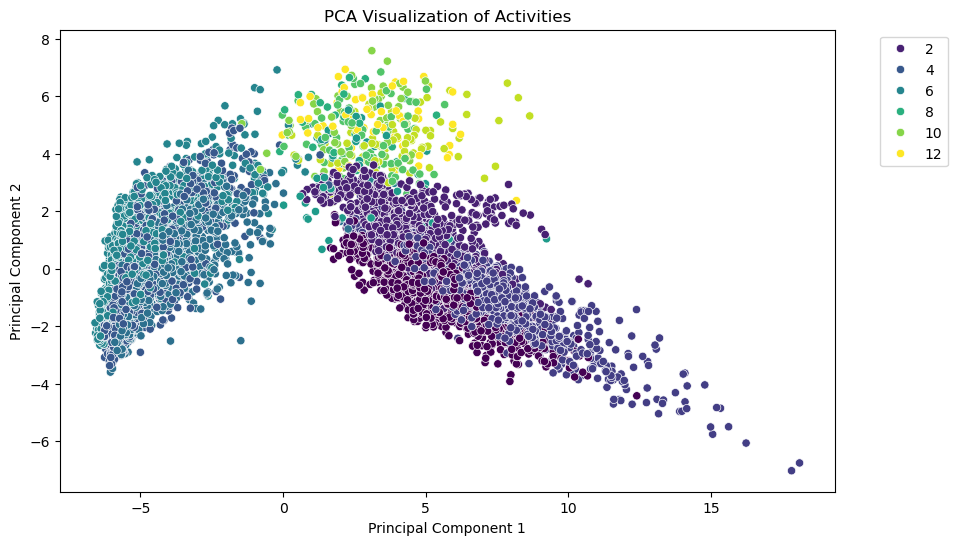


Original Class Distribution:
Counter({5: 1423, 6: 1413, 4: 1293, 1: 1226, 2: 1073, 3: 987, 11: 90, 9: 75, 10: 60, 12: 57, 7: 47, 8: 23})

Resampled Class Distribution:
Counter({5: 1423, 7: 1423, 4: 1423, 8: 1423, 11: 1423, 6: 1423, 10: 1423, 9: 1423, 12: 1423, 1: 1423, 3: 1423, 2: 1423})

Training Random Forest...

Training XGBoost...

Training k-Nearest Neighbors...

Training Naive Bayes...

Model Evaluation Results:
                 Model Test Accuracy Precision (Macro Avg) Recall (Macro Avg)
0        Random Forest        0.9197                0.8352             0.8414
1              XGBoost        0.9292                0.8430             0.8561
2  k-Nearest Neighbors        0.8899                0.7877             0.8241
3          Naive Bayes        0.7185                0.6267             0.6600


In [3]:


# Load the datasets
file_path_train = "activity_train.csv"  # Training dataset path
file_path_test = "activity_test.csv"  # Testing dataset path

data_train = pd.read_csv(file_path_train)
data_test = pd.read_csv(file_path_test)

# Inspect the training dataset
print("Training Dataset Overview:")
print(data_train.head())  # Display the first few rows
print(data_train.info())  # Display data types and null values
print(data_train.describe())  # Summary statistics

# Check for missing values in training data
missing_values_train = data_train.isnull().sum()
print("\nMissing Values in Training Data:")
print(missing_values_train)

# Check for duplicate rows in training data
duplicate_rows_train = data_train.duplicated().sum()
print(f"\nNumber of duplicate rows in training data: {duplicate_rows_train}")

# Check for missing values in test data
missing_values_test = data_test.isnull().sum()
print("\nMissing Values in Test Data:")
print(missing_values_test)

# Check for duplicate rows in test data
duplicate_rows_test = data_test.duplicated().sum()
print(f"\nNumber of duplicate rows in test data: {duplicate_rows_test}")

# Analyze target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='activity', data=data_train, palette='viridis')
plt.title('Class Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Compute and display correlation matrix
correlation_matrix = data_train.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Identify highly correlated features (|correlation| > 0.7)
highly_correlated = correlation_matrix.abs() > 0.7
correlated_features = highly_correlated[highly_correlated.sum(axis=1) > 1].index
print("\nHighly Correlated Features:")
print(correlated_features)

# Visualize pairwise relationships of selected features
selected_features = list(correlated_features[:3])  # Limit to top 3 correlated features
pairplot_data = data_train[selected_features + ['activity']]
sns.pairplot(pairplot_data, hue='activity', palette='husl')
plt.show()

# Perform PCA for dimensionality reduction
features = data_train.drop(columns=['activity']).fillna(0)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_data['Activity'] = data_train['activity']

# Visualize PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='Activity', palette='viridis')
plt.title('PCA Visualization of Activities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = data_train.drop(columns=['activity'])
y_train = data_train['activity']
X_test = data_test.drop(columns=['activity'])
y_test = data_test['activity']

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Balance classes in the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Display class distribution before and after SMOTE
print("\nOriginal Class Distribution:")
print(Counter(y_train))

print("\nResampled Class Distribution:")
print(Counter(y_train_resampled))

# Relabel target classes to start from 0
y_train_resampled = y_train_resampled - 1
y_test = y_test - 1

# Train and evaluate models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

results_summary = []

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    results_summary.append({
        "Model": model_name,
        "Test Accuracy": f"{accuracy:.4f}",
        "Precision (Macro Avg)": f"{class_report['macro avg']['precision']:.4f}",
        "Recall (Macro Avg)": f"{class_report['macro avg']['recall']:.4f}"
    })

# Display results summary
results_df = pd.DataFrame(results_summary)
print("\nModel Evaluation Results:")
print(results_df)


In [5]:
pca = PCA(n_components=0.999)  # Retain 99.9% variance
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train_resampled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")
# Hyperparameter tuning for selected models
# Step 3: Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

models_with_params = {
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "XGBoost": (XGBClassifier(eval_metric='mlogloss', random_state=42), param_grid_xgb),
    "k-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn),
    "Naive Bayes": (GaussianNB(), None)  # No hyperparameters to tune
}

# Step 4: Train and evaluate models
results_summary = []

for model_name, (model, param_grid) in models_with_params.items():
    print(f"\nTuning Hyperparameters for {model_name}...")
    
    if param_grid:  # Perform GridSearch for models with tunable parameters
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_pca, y_train_resampled)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:  # Naive Bayes (no hyperparameters to tune)
        best_model = model.fit(X_train_pca, y_train_resampled)
    
    # Predict on the test set
    y_pred = best_model.predict(X_test_pca)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']
    
    # Append results
    results_summary.append({
        "Model": model_name,
        "Test Accuracy": f"{accuracy:.2%}",
        "Precision (Macro Avg)": f"{precision:.2%}",
        "Recall (Macro Avg)": f"{recall:.2%}",
        "F1-Score (Macro Avg)": f"{f1_score:.2%}"
    })

    # Print confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

# Step 5: Display results
results_df = pd.DataFrame(results_summary)
print("\nFinal Model Evaluation Results:")
print(results_df)


Original number of features: 561
Reduced number of features after PCA: 283

Tuning Hyperparameters for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}

Confusion Matrix for Random Forest:
[[482   1  13   0   0   0   0   0   0   0   0   0]
 [ 32 432   7   0   0   0   0   0   0   0   0   0]
 [ 18  34 368   0   0   0   0   0   0   0   0   0]
 [  0   2   0 417  86   3   0   0   0   0   0   0]
 [  0   0   0  20 535   0   0   0   0   0   1   0]
 [  0   1   0   1   0 543   0   0   0   0   0   0]
 [  1   1   0   1   2   0  17   0   0   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   0  10   0]
 [  1   0   0   0   0   0   0   0   0  17   0   7]
 [  1   2   0   1   0   2   0   0   6   0  37   0]
 [  0   0   1   0   1   0   0   0   0   2   3  20]]

Tuning Hyperparameters for XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

C

c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
